# Lasso Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = 5 * X[:, 0] + 3 * X[:, 1] + 0.5 * np.random.randn(100)  # Linear relation with noise

## Split Data

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train Models

In [4]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [5]:
# Ridge Regression
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1)

In [6]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # L1 Regularization
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

## Predictions

In [7]:
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

## Evaluate Models

In [8]:
print("Linear Regression Coefficients:", linear_model.coef_)
print("Ridge Regression Coefficients:", ridge_model.coef_)
print("Lasso Regression Coefficients:", lasso_model.coef_)

Linear Regression Coefficients: [ 4.82647934  2.88303834  0.32395165  0.0727923  -0.22282008]
Ridge Regression Coefficients: [ 4.75289293  2.83663565  0.30915335  0.07668349 -0.22913579]
Lasso Regression Coefficients: [ 3.56942022  1.67669938  0.          0.         -0.        ]


In [9]:
# Mean Squared Error and R-squared
for model_name, y_pred in zip(
    ["Linear Regression", "Ridge Regression", "Lasso Regression"],
    [y_pred_linear, y_pred_ridge, y_pred_lasso],
):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} -> MSE: {mse:.2f}, R-squared: {r2:.2f}")

Linear Regression -> MSE: 0.24, R-squared: 0.86
Ridge Regression -> MSE: 0.24, R-squared: 0.86
Lasso Regression -> MSE: 0.32, R-squared: 0.82


## Visualize Coefficients

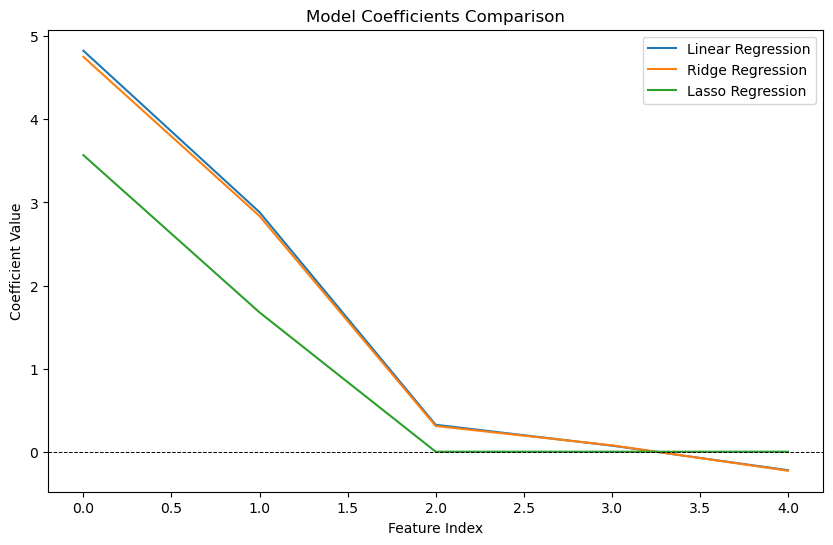

In [10]:
models = ["Linear Regression", "Ridge Regression", "Lasso Regression"]
coefficients = [
    linear_model.coef_,
    ridge_model.coef_,
    lasso_model.coef_,
]

plt.figure(figsize=(10, 6))
for i, coef in enumerate(coefficients):
    plt.plot(coef, label=models[i])

plt.title("Model Coefficients Comparison")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.axhline(0, color="black", linestyle="--", linewidth=0.7)
plt.legend()
plt.show()

**Observations**
1. **Linear Regression**:
   - Includes all features, regardless of their relevance.
   - Sensitive to multicollinearity and noise.

2. **Ridge Regression**:
   - Reduces the magnitude of all coefficients.
   - Retains all features but minimizes their impact if irrelevant.

3. **Lasso Regression**:
   - Shrinks irrelevant coefficients to exactly zero.
   - Performs automatic feature selection.


The coefficient plot shows the impact of Lasso in shrinking irrelevant feature coefficients to zero, compared to Ridge and Linear Regression, which retain all features.